In [1]:
import numpy as np 
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.utils import to_categorical

2024-04-30 14:46:05.140497: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Preprocessing

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

df = pd.DataFrame(wine_quality.data.original)

#set seeds to get reproducible results
np.random.seed(3)
random.seed(3)
tf.random.set_seed(3)

df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [3]:
def transform_le(dataframe, feature):
    """
    Encode categorical feature using LabelEncoder.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - feature (str): The name of the categorical feature to be encoded.

    Returns: none
    """
    # Initialize LabelEncoder
    le = preprocessing.LabelEncoder()
    
    # Encode the categorical feature
    dataframe[feature] = le.fit_transform(dataframe[feature])
    
    # Print the classes mapped by LabelEncoder
    print("Classes for {}: {}".format(feature, le.classes_))

In [4]:
for col in df.columns:
    transform_le(df, col)

#print to verify
df

Classes for fixed_acidity: [ 3.8   3.9   4.2   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2
  5.3   5.4   5.5   5.6   5.7   5.8   5.9   6.    6.1   6.15  6.2   6.3
  6.4   6.45  6.5   6.6   6.7   6.8   6.9   7.    7.1   7.15  7.2   7.3
  7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3   8.4   8.5
  8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9
 11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1
 12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.2  13.3  13.4
 13.5  13.7  13.8  14.   14.2  14.3  15.   15.5  15.6  15.9 ]
Classes for volatile_acidity: [0.08  0.085 0.09  0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14
 0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.2   0.205
 0.21  0.215 0.22  0.225 0.23  0.235 0.24  0.245 0.25  0.255 0.26  0.265
 0.27  0.275 0.28  0.285 0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.325
 0.33  0.335 0

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,36,117,0,23,65,11,28,823,74,33,14,2,0
1,40,153,0,36,87,29,61,735,43,45,24,2,0
2,40,129,4,31,81,16,48,755,49,42,24,2,0
3,74,38,56,23,64,19,54,838,39,35,24,3,0
4,36,117,0,23,65,11,28,823,74,33,14,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,22,24,29,17,28,28,87,224,50,27,53,3,1
6493,27,46,36,126,36,76,167,556,38,23,19,2,1
6494,26,30,19,9,30,35,106,348,22,23,14,3,1
6495,14,40,30,7,11,23,105,29,57,15,90,4,1


In [5]:
#standardizing features
sc = StandardScaler()
X = sc.fit_transform(df.drop(columns=['quality', 'color'],axis=1))
y = df['quality'].to_numpy()

In [6]:
#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 90)

In [7]:
def retain_variance(X_train, retained_variance):
    """
    Perform Principal Component Analysis (PCA) to retain specified variance.

    Parameters:
    - X_train (array-like): The training data.
    - retained_variance (float): The percentage of variance to retain.

    Returns:
    int: The number of principal components needed to retain the specified variance.
    """
    # Create an instance of the PCA model and specify the percentage of variance to retain
    pca = PCA(n_components=retained_variance / 100)

    # Fit the PCA model with the training data
    pca.fit(X_train)

    # Print the number of principal components needed to retain the specified variance
    print(f"To retain {retained_variance}% of the variation, {pca.n_components_} components are needed")

    # Return the number of principal components
    return pca.n_components_

retained_variance = 90  # Specify the percentage of variance to retain
n_components = retain_variance(X_train, retained_variance)

To retain 90% of the variation, 7 components are needed


In [8]:
# Make an instance of the model and specify that 90% of the variance needs to be retained
pca = PCA(0.90)

# Fit the PCA model to the training data
pca.fit(X_train)

# Transform the training and testing data using the trained PCA model
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Print the shapes of the transformed data
print("Shape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)

Shape of X_train_pca: (4872, 7)
Shape of X_test_pca: (1625, 7)


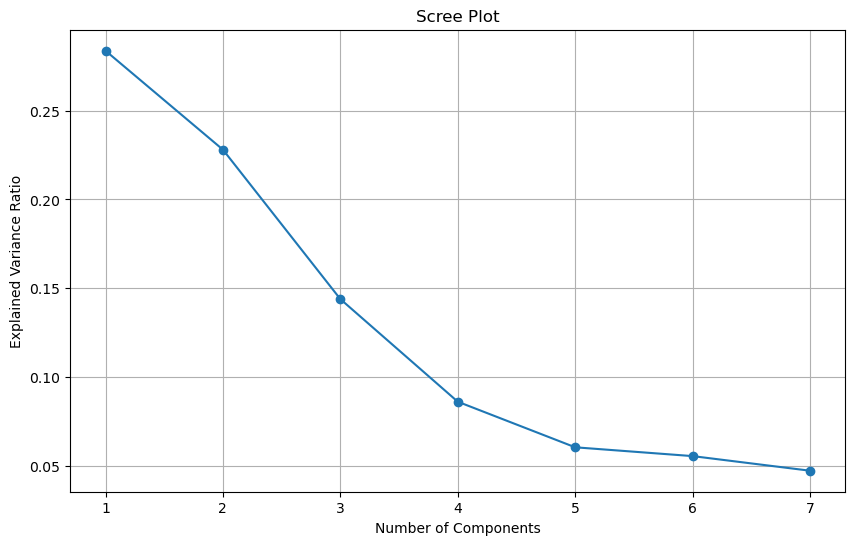

In [9]:
# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

Scree Plot: This plot shows the explained variance ratio for each principal component. It helps us understand how much of the total variance in the dataset is explained by each component. In this case, as the number of components increases, the explained variance ratio decreases. We can observe the point where the explained variance ratio starts to level off, indicating the optimal number of components to retain.

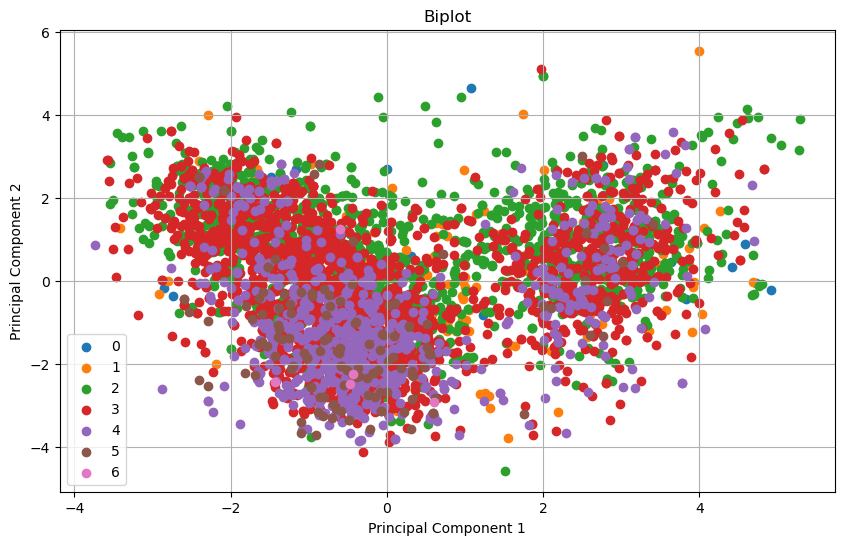

In [10]:
# Biplot
pca = PCA(n_components=2)
X_train_pca_2d = pca.fit_transform(X_train)
plt.figure(figsize=(10, 6))
for label in np.unique(y_train):
    plt.scatter(X_train_pca_2d[y_train==label, 0], X_train_pca_2d[y_train==label, 1], label=label)
plt.title('Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Biplot: The biplot visualizes the data in a reduced two-dimensional space, showing the relationship between the principal components and the original features. Each point represents a sample in the dataset, and its position in the plot is determined by its values in the first two principal components. The plot also includes labels indicating the classes of the samples. This visualization helps us understand the distribution of the data in the reduced space and the relationships between different samples.

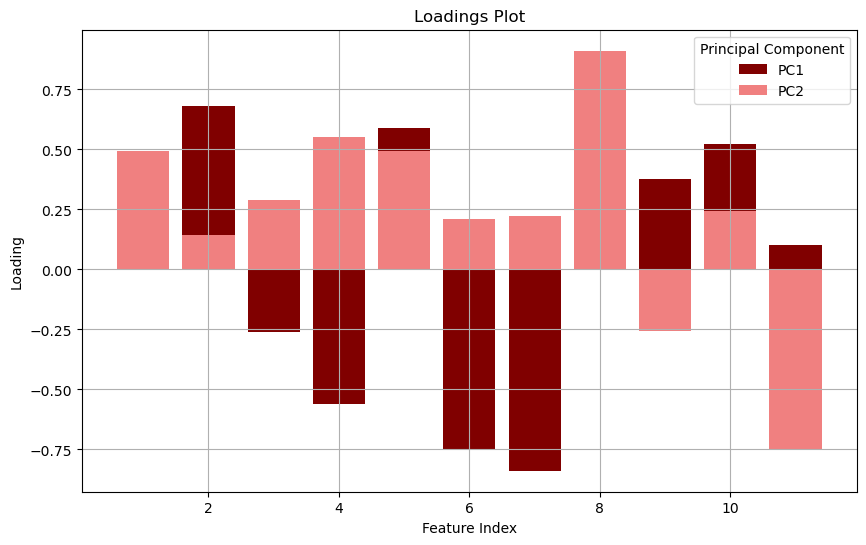

In [17]:
# Loadings Plot
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(10, 6))
bar1 = plt.bar(range(1, len(loadings) + 1), loadings[:, 0], label='PC1', color = 'maroon')
bar2 = plt.bar(range(1, len(loadings) + 1), loadings[:, 1], label='PC2', color = 'lightcoral')
plt.title('Loadings Plot')
plt.xlabel('Feature Index')
plt.ylabel('Loading')

# Create custom legend for feature index
legend_labels = [f'Feature {i}' for i in range(1, len(loadings) + 1)]
plt.legend([bar1, bar2], ['PC1', 'PC2'], title='Principal Component', loc='upper right')
plt.grid(True)
plt.show()

Loadings Plot: This plot shows the loadings of each feature on the first two principal components. Loadings represent the correlations between the original features and the principal components. A higher loading value indicates a stronger relationship between the feature and the principal component. This plot helps us identify which features contribute the most to the variation captured by each principal component.

# Implementation and Analysis

Model: LinearRegression | PCA: 7 components | MSE: 0.57999
Model: Lasso | PCA: 7 components | MSE: 0.76234
Model: RandomForestRegressor | PCA: 7 components | MSE: 0.40413
Model: GradientBoostingRegressor | PCA: 7 components | MSE: 0.51530
Model: KNeighborsRegressor | PCA: 7 components | MSE: 0.54442
Model: DecisionTreeRegressor | PCA: 7 components | MSE: 0.62057


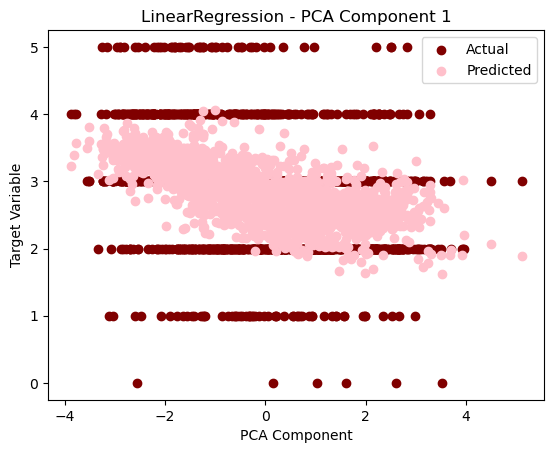

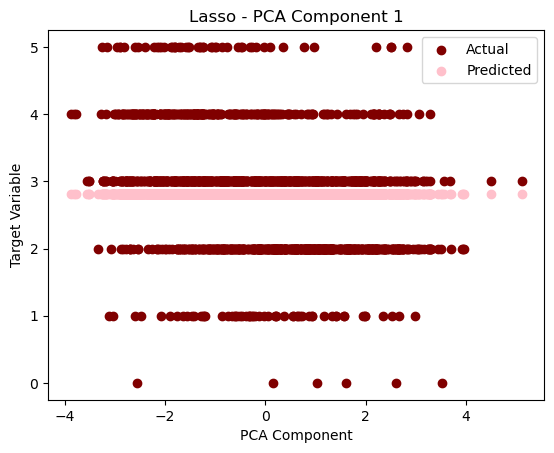

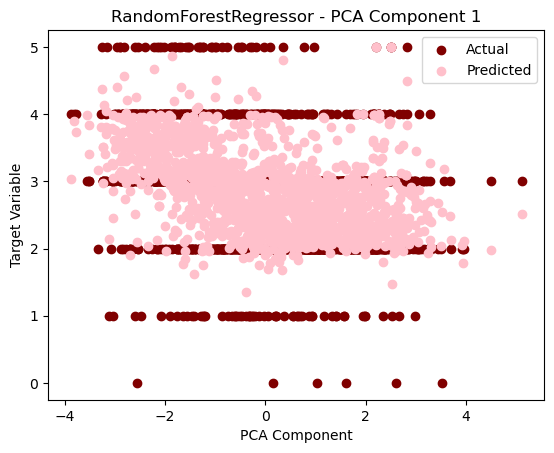

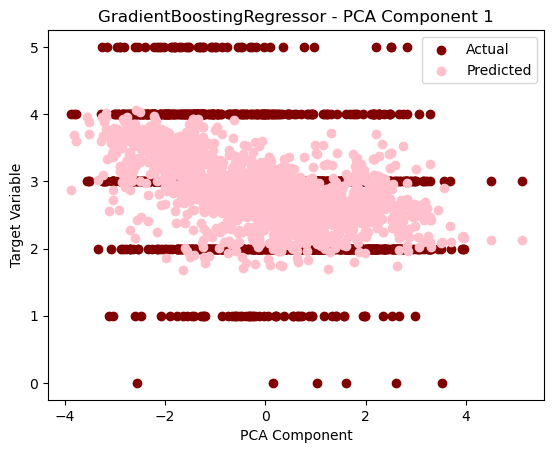

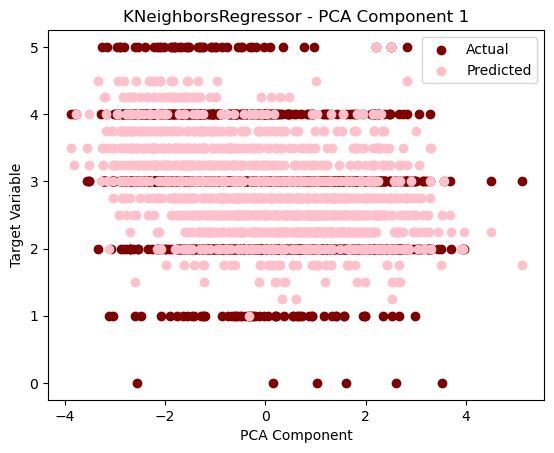

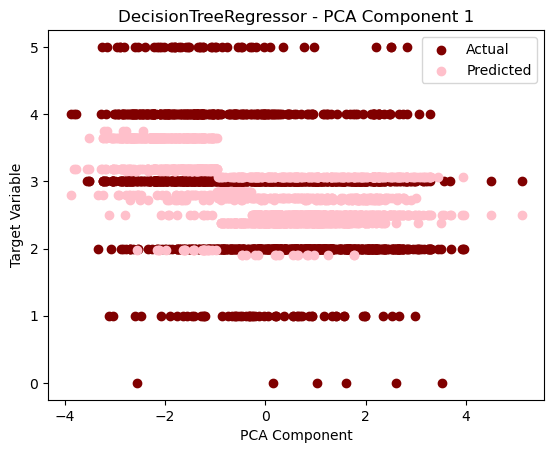

In [18]:
# Load necessary models
lin_reg = LinearRegression()  # Linear Regression model
lasso_reg = Lasso()  # Lasso Regression model
rf_reg = RandomForestRegressor()  # Random Forest Regression model
gb_reg = GradientBoostingRegressor()  # Gradient Boosting Regression model
knn = KNeighborsRegressor(n_neighbors=4)  # K-Nearest Neighbors model
dt = DecisionTreeRegressor(max_depth=4)  # Decision Tree model

# List of models
models = [lin_reg, lasso_reg, rf_reg, gb_reg, knn, dt]

# Visualize each model
for model in models:
    # Fit the model to the PCA-transformed training data
    model.fit(X_train_pca, y_train)
    
    # Predict the target variable using the PCA-transformed testing data
    y_pred = model.predict(X_test_pca)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print the model, its PCA, and the MSE
    print(f"Model: {model.__class__.__name__} | PCA: {X_train_pca.shape[1]} components | MSE: {mse:.5f}")
    
    # Plot the predicted and actual values against each other for each PCA component
    for i in range(1, X_test_pca.shape[1]):
        if i == 1:  # Plot only for the first PCA component
            fig, ax = plt.subplots(1, 1)
            ax.scatter(X_test_pca[:, i], y_test, label='Actual', color = 'maroon')
            ax.scatter(X_test_pca[:, i], y_pred, label='Predicted', color = 'pink')
            ax.set_title(f"{model.__class__.__name__} - PCA Component {i}")
            ax.set_xlabel('PCA Component')
            ax.set_ylabel('Target Variable')
            ax.legend()

Overall, Random Forest Regressor performed the best among the models, followed by Gradient Boosting Regressor and Linear Regression. Lasso Regression had the highest MSE, suggesting that it might not be the best choice for this particular dataset.